## Data Understanding

Meillä on käytössä datasetti, joka on kerätty ajamalla automaattinen scripti CarGurun verkkosivujen käytettyjen autojen inventaariosta. Datasetti sisältää noin 3 miljoonaa riviä ja 66 saraketta. Dataa ei siis tässä projektissa tarvitse kerätä itse vaan se on jo valmiina. Dataa on kerätty autojen verkkosivujen myyntitiedotteiden kautta. Projektiin data on ladattu osoitteesta https://www.kaggle.com/datasets/ananaymital/us-used-cars-dataset. Tulemme käyttämään projektissa näillä näkymin kaikkia 3 miljoonaa riviä, katsotaan kuitenkin projektin edetessä miten asiat sujuvat ja tulemmeko pienentämään datan määrää jossain kohtaa. Tarkastellaan seuraavaksi hieman tuota dataa tarkemmin ja katsotaan miltä se näyttää.  

CarGurusta hieman eli se on perustettu vuonna 2006 Cambridgessa, Massachusettsissa Langley Steinertin toimesta, joka on myös yksi TripAdvisorin perustajista. Langley näki mahdollisuuden parantaa asiakkaan autonostokokemusta teknologian ja data-analytiikan avulla. Nopeasti GarGurun verkkosivusto on noussut Yhdysvaltojen vierailluimmaksi autonkauppasivustoksi. CarGurussa on tällä hetkellä eniten autoja, jos katsotaan autoalan online-markkipaikkoja. GarGuru toimii Yhdysvaltojen lisäksi myös Kanadassa ja Isossa-Britanniassa.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px


In [4]:
chunksize = 20000
chunks = pd.read_csv("../data/used_cars_data.csv", chunksize=chunksize, low_memory=False, index_col='vin')

df_list = []

for chunk in chunks:
    df_list.append(chunk)

df = pd.concat(df_list, axis=0)

In [9]:
df.isna().sum()

back_legroom             159269
bed                     2980472
bed_height              2570942
bed_length              2570942
body_type                 13543
                         ...   
wheel_system             146732
wheel_system_display     146732
wheelbase                159269
width                    159269
year                          0
Length: 65, dtype: int64

In [5]:
shape = df.shape
print(f"Dataframissä on rivejä {shape[0]} ja sarakkeita on {shape[1]}.")

Dataframissä on rivejä 3000040 ja sarakkeita on 65.


Ylhäältä olevasta tyhjien kenttien määrästä voidaan jo todeta, että datasetissä on todella paljon tyhjiä kenttiä ja muutamassa sarakkeessa kaikki arvot ovat tyhjiä tai lähes tyhjiä. Nämä voidaan tietysti datan siivoamisvaiheessa poistaa dataframesta kokonaan. Dataa tulee myös käsitellä myöhemmässä vaiheessa, jos haluamme, että autojen hintojen ennustettavuus olisi edes vähän tarkkaa. Data käydään lävitse seuraavassa vaiheessa tarkemmin, keskitytään nyt hieman tutustumaan dataan. Voitaisiin tässä kohtaa katsoa hieman tärkeimpiä sarakkeita ja mitä ne tarkoittavat.

On myös hyvä huomata, että hinta sarakkeessa ei ole ollenkaan tyhjiä kenttiä ja se on erittäin hyvä asia, kun lähdemme sitä ennustamaan. 

- vin: Type String. Auton tunnistetieto, jolla auto voidaan yksilöidä (ei tule varmaankaan olemaan tärkeä ennustamisen kannalta) Lisätietoja voi hakea https://www.autocheck.com/vehiclehistory/vin-basics
- back_legroom: Type String. Takaosan jalkatilan koko tuumina.
- body_type: Type String. Auton korityyppi kuten:Convertible, Hatchback, Sedan, jne.
- city: Type String. Kaupunki, jossa auto on myytävänä
- city_fuel_economy: Type Float. Auton kulutus kaupunki ajossa l/km
- daysonmarket: Type Integer. Kuinka monta päivää ollut myynnissä nettisivuilla
- engine_cylinders: Type String. Moottorin kokoonpano kuten: I4, V6, jne.
- engine_displacement: Type Float. moottorin iskutilavuus on mäntämoottorin kaikkien mäntien pyyhkäisemän sylinterin tilavuuden mitta, polttokammioita lukuun ottamatta
- engine_type: Type String. Moottorin kokoonpano  kuten: I4, V6, etc.
- exterior_color: Type String. Auton ulkopuolen väri ja yleensä sama kuin esitteessä
- fleet: Type Boolean. Ilmeisti kertoo onko auto ollut kaupallisessa käytössä ei siis perheiden tai yksityisten käytössä
- frame_damaged: Type Boolean. Onko ajoneuvon runko vaurioitunut.
- front_legroom: Type String. Jalkatila edessä tuumina
- fuel_tank_volume: Type String. Kuinka monta gallonaa mahtuu tankkiin eli kapasiteetti gallonina
- fuel_type: Type String. Mikä on bensan tyyppi
- has_accidents: Type Boolean. Löytyykö vinin mukaan vaurio tietoja
- height: Type String. Ajoneuvon korkeus tuumina
- highway_fuel_economy: Type Float. Maantiekulutus l/km
- horsepower: Type Float. Hevosvoimat, joita moottori tuottaa
- interior_color: Type String. Sisätilan väri yleensä sama kuin esitteessä.
- isCab: Type Boolean. Onko ollut aikaisemmin taksikäytössä
- is_cpo: Type Boolean. Jälleenmyyjän sertifioimat käytetyt autot. Sertifioiduilla ajoneuvoilla on valmistajan takuu ilmaista korjausta varten tietyn ajan. Lue lisää osoitteesta https://www.cartrade.com/blog/2015/auto-guides/pros-and-cons-of-buying-a-certified-pre-owned-car-1235.html
- is_new: Type Boolean. Jos arvo on tosi tarkoittaa, että alle kaksi vuotta vanha
- is_oemcpo: Type Boolean. Valmistajan sertifioimat käytetyt autot. Lue lisää osoitteessa https://www.cargurus.com/Cars/articles/know_the_difference_dealership_cpo_vs_manufacturer_cpo
- latitude: Type Float. Leveysaste jälleenmyyjän maantieteellisestä sijainnista
- length: Type String. Auton leveys tuumina
- listed_date: Type String. Päivämäärä, jolloin ajoneuvo listattiin verkkosivustolle. Ei tee days_on_marketista vanhentunutta. Hinnat ovat päivää_markkinoilla päivää listatun päivämäärän jälkeen
- listing_color: Type String. Hallitsevampi väri ulkovärissä
- longitude: Type Float. Pituusaste jälleenmyyjän maantieteellisestä sijainnista.
- major_options: Type String. Vapaaehtoiset paketit autoon
- make_name: Type String. Auton brändi
- maximum_seating: Type String. Istumapaikat autossa
- mileage: Type Float. Ajetut mailit
- model_name: Type String. Ajoneuvon malli
- owner_count: Type Float. Aikaisempien omistajajien lukumäärä
- power: Type String. Maksimi teho ja kierrosluku
- price: Type Float. Myyntihinta nettisivuilla
- seller_rating: Type Float. Myyjän arvosana, jonka asiakkaat ovat antaneet.- theft_title: Type String. Onko auto ollut varastettu aikaisemmin.
- torque: Type String. Vääntömomentti ilmaisee voiman, joka kohdistuu käyttöakseliin. Myös maksimivääntömomentin saavuttamiseksi tarvittavat kierrokset.
- transmission: Type String. Ajoneuvon vaiheteisto kuten: manuaali, automaatti jne.
- transmission_display: Type String Vaihteiden lukumäärä ja kerrotaan onko automaatti, manuaali ja jne. 
- trimId: Type String. Mallin tietyn version numero tietyllä kokoonpanolla.
- trim_name: Type String. Mallin tietyn version nimi tietyllä kokoonpanolla.
- vehicle_damage_category: Type Float. Ajoneuvon vaurioiden luokka, kuten luokka A, joka tarkoittaa romuautoa.
- wheel_system: Type String. Ajoneuvon vetojärjestelmä, kuten AWD tai FWD.
- wheel_system_display: Type String. Ajoneuvon vetojärjestelmä, kuten neliveto tai etuveto.
- wheelbase: Type String. Ajoneuvon etu- ja taka-akselin välinen etäisyys.
- width: Type String. Ajoneuvon molempien sivujen välinen etäisyys.
- year: Type Integer. Valmistusvuosi

Katsotaan seuraavaksi tyjien kenttien prosenttiosuus sarakkeissa. 


In [10]:
df_info = df.isna().sum()/df.shape[0]*100

# Laitetaan dataframeen niin nähdään paremmin ja kännetään se vielä 
na_info_df = df_info.to_frame().T

na_info_df

,back_legroom,bed,bed_height,bed_length,body_type,cabin,city,city_fuel_economy,combine_fuel_economy,daysonmarket,...,transmission,transmission_display,trimId,trim_name,vehicle_damage_category,wheel_system,wheel_system_display,wheelbase,width,year
0,5.308896,99.347742,85.696924,85.696924,0.451427,97.882262,0.0,16.375948,100.0,0.0,...,2.139471,2.139471,3.860849,3.876415,100.0,4.891001,4.891001,5.308896,5.308896,0.0


Tästä nähdään, että datassa on useampi sarake, jossa prosenttuaalisestikin dataa puuttuu paljon. Tulemme datan siivousvaiheessa sopimaan ryhmän kesken, mikä olisi sopiva prosenttiosuus tyhjien kenttien määrässä, jolloin sarakkeet tiputettaisiin kokonaan pois lopullisesta datasta. Tällä hetkellä arvioisimme sen olevan noin 40-50 %, mutta tarkastetaan tämä vielä myöhemmin. Katsotaan seuraavaksi miltä datan kuvaus näyttää ja mitä siitä saataisiin selville.   

In [11]:
df.describe().round(3)

,city_fuel_economy,combine_fuel_economy,daysonmarket,engine_displacement,highway_fuel_economy,horsepower,is_certified,latitude,listing_id,longitude,mileage,owner_count,price,savings_amount,seller_rating,sp_id,vehicle_damage_category,year
count,2508755.000,0.0,3000040.000,2827654.000,2508755.000,2827654.000,0.0,3000040.000,3.000040e+06,3000040.000,2.855653e+06,1483027.000,3000040.000,3000040.000,2959168.000,2999944.000,0.0,3000040.000
mean,22.693,NaN,76.060,2968.488,29.473,247.996,NaN,36.984,2.754987e+08,-90.642,3.114690e+04,1.533,29933.367,550.977,4.270,233522.406,NaN,2017.728
std,8.807,NaN,108.884,1348.905,7.769,90.466,NaN,4.997,8.894123e+06,13.906,7.458674e+04,0.920,19566.170,1079.448,0.513,132322.071,NaN,4.179
min,7.000,NaN,0.000,700.000,10.000,55.000,NaN,18.347,1.994620e+07,-157.928,0.000000e+00,1.000,165.000,0.000,1.000,41593.000,NaN,1915.000
25%,18.000,NaN,14.000,2000.000,25.000,175.000,NaN,33.509,2.745794e+08,-97.088,6.000000e+00,1.000,18451.000,0.000,4.000,63375.000,NaN,2017.000
50%,21.000,NaN,35.000,2500.000,29.000,244.000,NaN,37.847,2.785453e+08,-87.250,8.267000e+03,1.000,26477.000,0.000,4.341,281627.000,NaN,2020.000
75%,26.000,NaN,82.000,3600.000,33.000,300.000,NaN,41.006,2.804553e+08,-80.455,4.366200e+04,2.000,38220.000,785.000,4.605,336614.000,NaN,2020.000
max,127.000,NaN,3599.000,8400.000,127.000,1001.000,NaN,61.203,2.820222e+08,-66.078,9.999999e+07,19.000,3299995.000,147414.000,5.000,440951.000,NaN,2021.000


Tästä voidaan havaita, että suuria heittelyjä autojen väleillä on kuten hinnassa, aikaisempien omistajien lukumäärässä, autojen iässä ja kulutuksessa. Tästäkin nähdään, että yhdistettykulutus-sarake sisältää pelkkiä nolla-arvoja. Olisko mahdollista yhdistää city_fuel_economy ja highway_fuel_economy sarakkeet ja muodostaa näistä yhdistettykulutus. Tätä pitää melkein tarkastella vielä jatkossa. 

Jos tarkastellaan daysonmarket-saraketta niin nähdään, että auto on keskimäärin 1-2 kuukautta myytävänä. Jotkut autot myydän samana päivänä, kun taas toiset saattavat ottaa kauankin myynnissä ennekuin menevät kaupaksi. 

Hevosvoimien osalta nähdään, että keskimäärin hevosvoimia on noin 244 ja suurin on yli 1000, pienimmän olessa alle 60 hp. 

Keskimäärin hinta on ollut siinä 26500 USD, kun taas pienin hinta autolle on ollut alle 200 ja suurin myyntihinta on ollut yli 3 miljoonan. 

Katsotaan seuraavaksi miltä näyttää ensimmäiset 5 riviä datasta. 

In [12]:
df.head(6)

,back_legroom,bed,bed_height,bed_length,body_type,cabin,city,city_fuel_economy,combine_fuel_economy,daysonmarket,...,transmission,transmission_display,trimId,trim_name,vehicle_damage_category,wheel_system,wheel_system_display,wheelbase,width,year
vin,,,,,,,,,,,,,,,,,,,,,
ZACNJABB5KPJ92081,35.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,Bayamon,NaN,NaN,522,...,A,9-Speed Automatic Overdrive,t83804,Latitude FWD,NaN,FWD,Front-Wheel Drive,101.2 in,79.6 in,2019
SALCJ2FX1LH858117,38.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,207,...,A,9-Speed Automatic Overdrive,t86759,S AWD,NaN,AWD,All-Wheel Drive,107.9 in,85.6 in,2020
JF1VA2M67G9829723,35.4 in,NaN,NaN,NaN,Sedan,NaN,Guaynabo,17.0,NaN,1233,...,M,6-Speed Manual,t58994,Base,NaN,AWD,All-Wheel Drive,104.3 in,78.9 in,2016
SALRR2RV0L2433391,37.6 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,196,...,A,8-Speed Automatic Overdrive,t86074,V6 HSE AWD,NaN,AWD,All-Wheel Drive,115 in,87.4 in,2020
SALCJ2FXXLH862327,38.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,137,...,A,9-Speed Automatic Overdrive,t86759,S AWD,NaN,AWD,All-Wheel Drive,107.9 in,85.6 in,2020
SALYK2EX1LA261711,37.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,242,...,A,8-Speed Automatic Overdrive,t85614,P250 R-Dynamic S AWD,NaN,AWD,All-Wheel Drive,113.1 in,84.4 in,2020


Tästä nähdään ainakin heti, että täytearvoina on NaN-arvoja. Tarkastellaan vielä tarkemmin onko datassa käytetty muita täytearvoja.

In [13]:
df["back_legroom"].unique()

array(['35.1 in', '38.1 in', '35.4 in', '37.6 in', '37.1 in', '33.8 in',
       '--', '35 in', '39.6 in', '35.7 in', '27.3 in', '38.4 in',
       '36.8 in', '38.6 in', '39.4 in', nan, '34.1 in', '39.5 in',
       '36.2 in', '39.9 in', '37 in', '37.2 in', '38.3 in', '27.1 in',
       '40.1 in', '34.6 in', '35.3 in', '37.4 in', '38 in', '39.7 in',
       '35.6 in', '42.6 in', '33.7 in', '39 in', '38.2 in', '33 in',
       '37.9 in', '29.9 in', '37.8 in', '36.1 in', '34.2 in', '37.3 in',
       '40.3 in', '35.8 in', '39.3 in', '38.7 in', '39.1 in', '43.6 in',
       '41.7 in', '36.3 in', '45.2 in', '30.6 in', '43.4 in', '36.6 in',
       '33.1 in', '35.5 in', '39.8 in', '35.2 in', '40.9 in', '38.5 in',
       '36.5 in', '35.9 in', '44.3 in', '34.3 in', '33.4 in', '32.2 in',
       '33.3 in', '34.8 in', '30.8 in', '31.4 in', '37.7 in', '31.7 in',
       '36.4 in', '32.6 in', '40.4 in', '34.7 in', '40 in', '41.9 in',
       '30.5 in', '30.3 in', '33.5 in', '33.9 in', '29.2 in', '38.8 in',
 

In [14]:
df["city_fuel_economy"].unique()

array([ nan,  17.,  22.,  27.,  18.,  15.,  20.,  24.,  23.,  16.,  19.,
        31.,  21.,  13.,  25.,  28.,  29.,  30.,  12.,  14.,  26.,  48.,
        41.,  46.,  55.,  37.,  54.,  51.,  33.,  47.,  43.,  66., 127.,
        10.,  34.,  42.,  53.,  70.,  40.,  36.,  11.,  57.,  45.,  44.,
        50.,  35.,  32.,  89.,  91., 120., 124.,  62.,  38., 102., 118.,
        85., 126.,  88., 101.,  83.,  52.,  49.,  81.,  39.,  59.,  58.,
       114.,  95.,  68.,  94.,  64.,  74., 110., 123.,  99.,  80., 125.,
       121.,  76.,  56.,   8.,   9.,  63.,  67., 106.,  92.,  86., 107.,
         7., 115., 122.,  90., 104.,  97.,  60.,  65.,  72.,  98.,  93.,
       112.,  78.])

Näyttäisi, kun dataa tarkastelee lävitse niin pääasiassa täytearvona on käyttetty NaN-arvoa, mutta muutamissa sarakkeissa esiintyy myös muita merkkejä kuten --. Nämä tulee huomioida datan siivousvaiheessa. Yllä nähdään myös, kun katsotaan jalkatilan arvoa niin huomataan, että se on merkitty niin, että siinä on lukuarvo ja tuumat. Tämä tulee muuttaa niin, että jäljelle jää vain tuo lukuarvo. Muita samanlaisia sarakkeitakin on useampi eli nämä tulee kaikki huomioida, kun siivotaan dataa.

Katsotaan onko datassa samoja rivejä. 

In [16]:
duplucate_rows = df.duplicated().sum()

print(f"Samoja rivejä on yhteensä {duplucate_rows}.")

Samoja rivejä on yhteensä 40.


Näyttäisi, että samoja rivejä datassa on yhteensä 40 kpl. Nämä tulee käsitellä, kun siivotaan dataa. 

Miltä näyttää korrelaatio tämän hetken dataframessa lukuarvojen kesken. Otetaan tässä kohtaa dataframesta pois jo nuo muutamat tyhjät sarakkeet (combine_fuel_economy, is_certified ja vehicle_damage_category) niin ne eivät aiheuta hämminkiä, kun katsotaan korrelaatiota. 

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 [Text(0.5, 0, 'city_fuel_economy'),
  Text(1.5, 0, 'engine_displacement'),
  Text(2.5, 0, 'highway_fuel_economy'),
  Text(3.5, 0, 'horsepower'),
  Text(4.5, 0, 'latitude'),
  Text(5.5, 0, 'longitude'),
  Text(6.5, 0, 'mileage'),
  Text(7.5, 0, 'owner_count'),
  Text(8.5, 0, 'price'),
  Text(9.5, 0, 'seller_rating'),
  Text(10.5, 0, 'sp_id')])

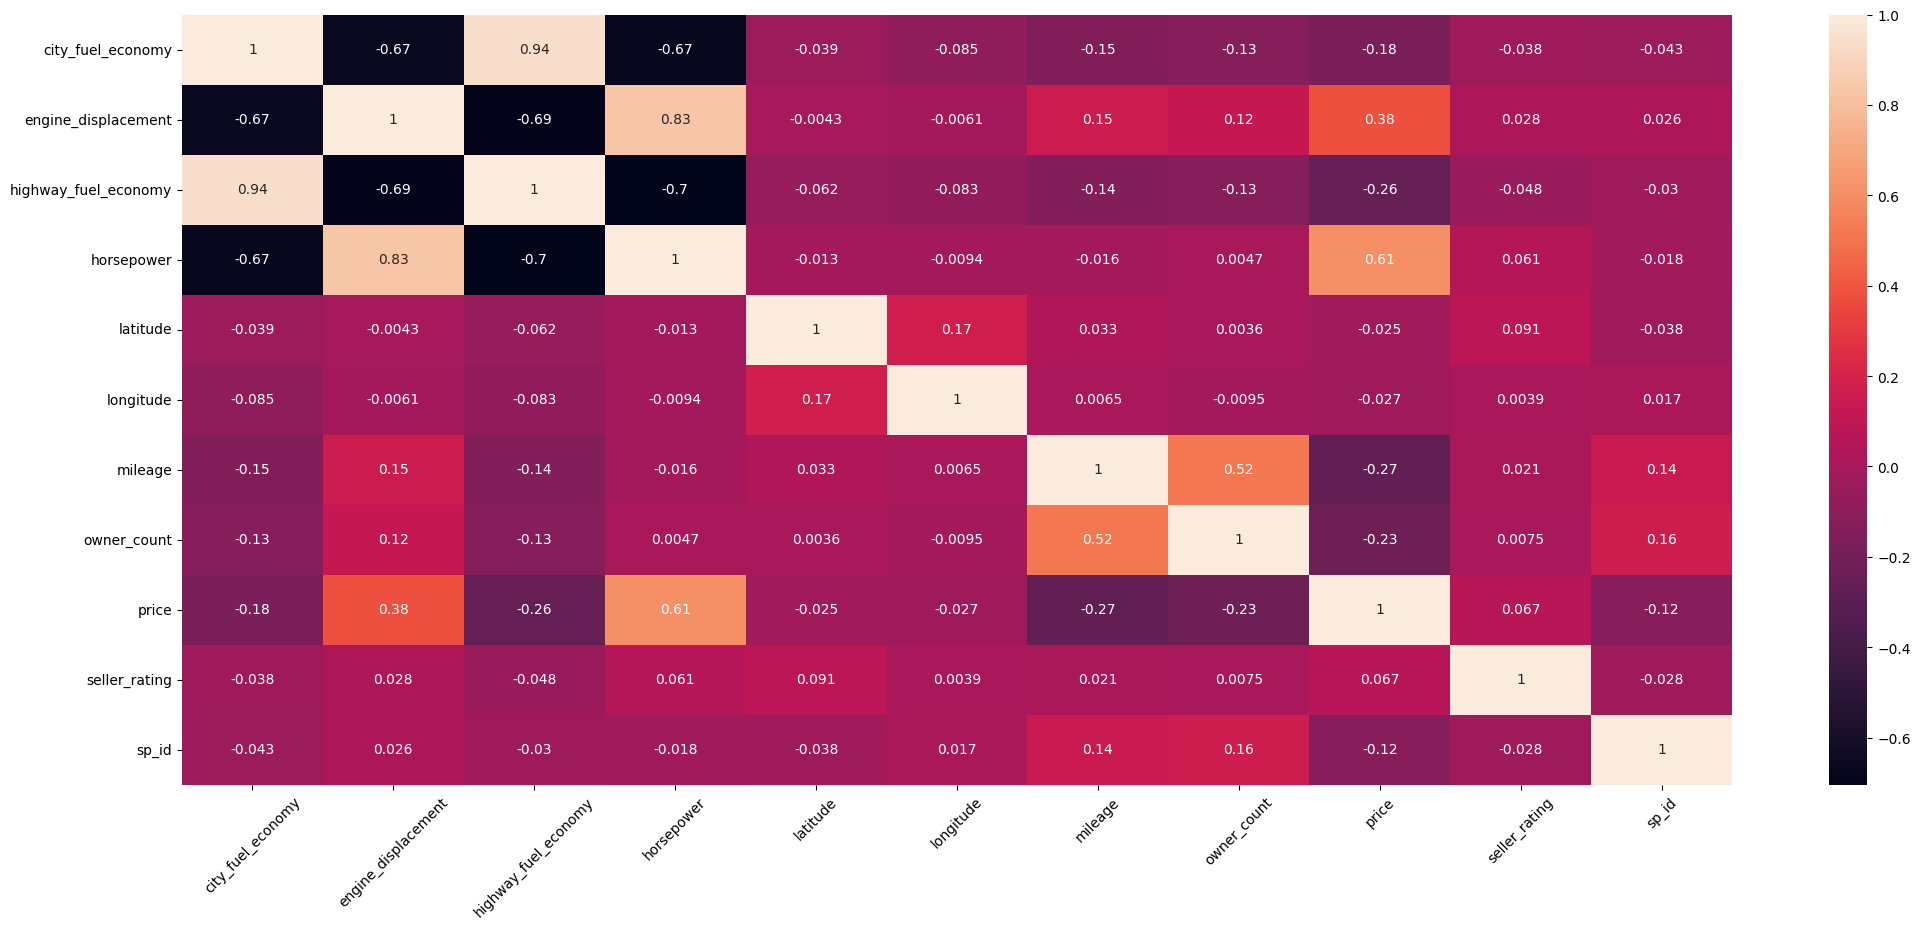

In [17]:
df_new = df.drop(columns=["combine_fuel_economy","is_certified","vehicle_damage_category"])
plt.figure(figsize = (25 , 10))
sns.heatmap(df_new.select_dtypes('float' , 'int').corr() , annot = True)
plt.xticks(rotation = 45)

Kun katsotaan hieman korrelaatioita niin voidaan huomata ainakin, että hintaan vaikuttaa suuresti auton hevosvoimat (0,61) myös omistajien lukumäärällä, ajetuilla maileilla ja moottorin tyypillä on vaikutusta, kun mietitään auton hintaa. Vähiten hintaan vaikuttaa jälleenmyyjän leveys- ja pituusaste. Näyttäisi myös, että aikaisempien omistajien lukumäärä vaikuttaa suuresti ajettuihin maileihin. 

Muutamat sarakkeet näyttäisi myös olevan samat tai niissä on samoja asioita ja näitä on turha viedä moneen kertaan loppulliseen dataan. Tarkastetaan löytyykö datasta samoja sarakkeita.  

In [18]:
def find_duplicate_columns(df):
    duplicate_columns = {}
    for i in range(df.shape[1]):
        for j in range(i+1, df.shape[1]):
            col1 = df.iloc[:, i]
            col2 = df.iloc[:, j]
            if col1.equals(col2):
                col1_name = df.columns[i]
                col2_name = df.columns[j]
                if col1_name not in duplicate_columns:
                    duplicate_columns[col1_name] = [col2_name]
                else:
                    duplicate_columns[col1_name].append(col2_name)
    return duplicate_columns


find_duplicate_columns(df_new)

{'engine_cylinders': ['engine_type']}

Kaksi täysin samaa saraketta löytyi dataframista eli toinen näistä voidaan poistaa suoraan. Datassa on kuitenkin sarakkeita, jotka sisältävät samoja asioita kuten engine_type ja fuel_type. 

In [19]:
df_new = df_new.drop(columns=["engine_cylinders"])
df_new["engine_type"].unique()

array(['I4', 'H4', 'V6', 'I6', 'V6 Diesel', nan, 'V8', 'V8 Biodiesel',
       'V8 Flex Fuel Vehicle', 'V6 Flex Fuel Vehicle', 'I4 Hybrid',
       'V6 Hybrid', 'I3', 'I5', 'I4 Flex Fuel Vehicle', 'I4 Diesel',
       'I6 Diesel', 'V8 Diesel', 'R2', 'W12', 'V10', 'V12',
       'V6 Biodiesel', 'H6', 'I2', 'W12 Flex Fuel Vehicle',
       'I5 Biodiesel', 'V8 Hybrid', 'H4 Hybrid',
       'V8 Compressed Natural Gas', 'I6 Hybrid', 'I5 Diesel', 'W8',
       'I4 Compressed Natural Gas', 'V10 Diesel', 'W16', 'V8 Propane',
       'I3 Hybrid', 'V6 Compressed Natural Gas', 'V12 Hybrid'],
      dtype=object)

Niinkuin tästä huomataan on engine_typissa aina mukana tuo polttoaineen merkintä eli tätä ei tulla tarvitsemaan myöhemmin. Käsitellään tämäkin, kun päästään vaiheeseen, jossa dataa siivotaan.

## Datan visualisointia

Käydään seuraavaksi hieman visuaalisesti läpi miltä data näyttää. Tutkitaan hieman kuinka kauan ja kuinka monta auto on ollut myytävänä.

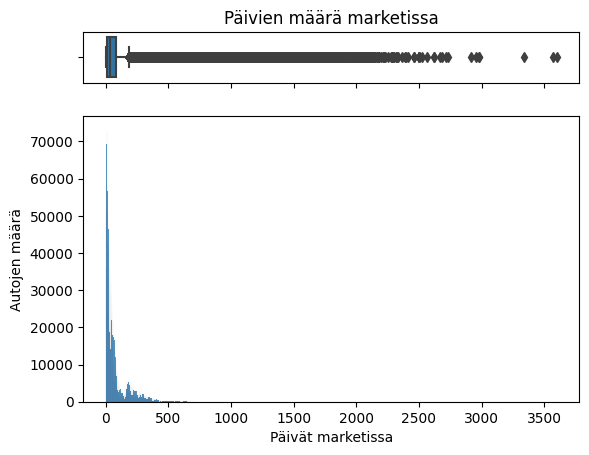

In [22]:
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(x=df_new["daysonmarket"], ax=ax_box)

sns.histplot(data=df_new, x="daysonmarket", ax=ax_hist, kde=False)

ax_box.set(xlabel='')

ax_box.set(title='Päivien määrä marketissa')
ax_hist.set(xlabel='Päivät marketissa', ylabel='Autojen määrä')

plt.show()

Tästäkin voidaan havaita, että suurin osa autoista on ollut myynnissä sen 1-2 kuukautta. Poikkeamiakin löytyy kuten ylläolevasta kaaviosta näkyy. Yksi auto on ollut myynnissä jo yli 3500 päivää. 

Katsotaan seuraavaksi miten autojen istuinpaikat jakautuu datassa.

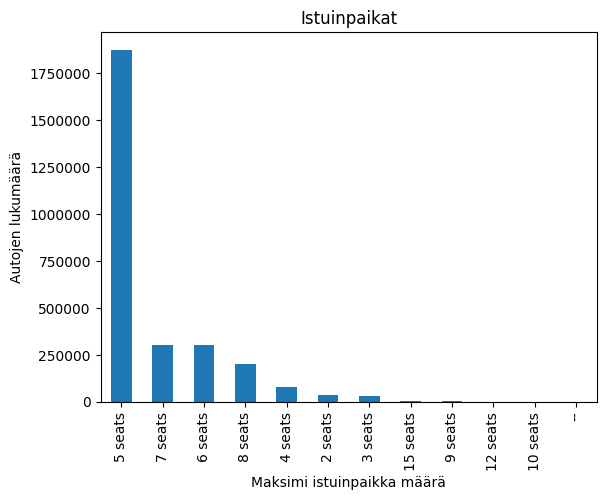

In [27]:
import matplotlib.ticker as ticker

maxseats = df_new['maximum_seating'].value_counts()
maxseats.plot.bar()
plt.title("Istuinpaikat")
plt.xlabel("Maksimi istuinpaikka määrä")
plt.ylabel("Autojen lukumäärä")


def plain_number(x, pos):
    return f'{int(x)}'

plt.gca().yaxis.set_major_formatter(FuncFormatter(plain_number))

plt.show()

Tästä nähdään suoraan, että suurimmassa osassa autoista on 5 istuinta ja seuraavaksi tulevat 7 ja 6 paikaiset ajoneuvot. 

Tutkitaan vähän miten autojen hinnat on jakautunut datassa. 

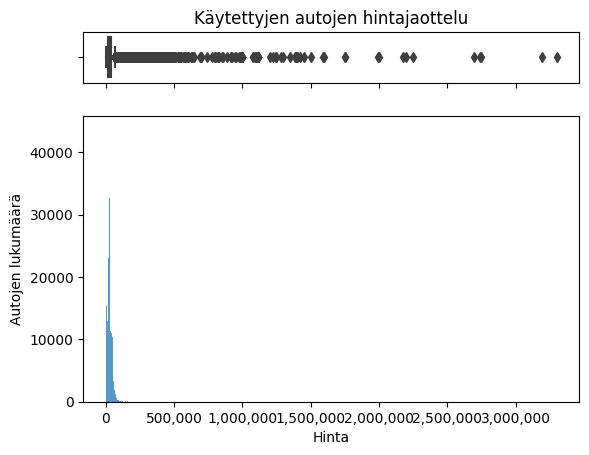

In [28]:


fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(x=df_new["price"], ax=ax_box)

sns.histplot(data=df_new, x="price", ax=ax_hist, kde=False)

ax_box.set(xlabel='')

ax_box.set(title='Käytettyjen autojen hintajaottelu')
ax_hist.set(xlabel='Hinta', ylabel='Autojen lukumäärä')

ax_hist.get_xaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.show()

Tästä nähdään, että suurin osa autojen hinnoista on alle 75 000 USD ja muutamia autoja on sitten tätä kalliimpia. Poikkeamia siis löytyy kuten kuva osoittaa.

Katsotaan vielä, jos jaetaan autot merkkien mukaan ja tutkitaan alustavasti kauanko autolla on mennyt, että se on myyty. 

<AxesSubplot: title={'center': 'Kauanko kestää, että auto myydään'}, xlabel='Brandit', ylabel='Päivät'>

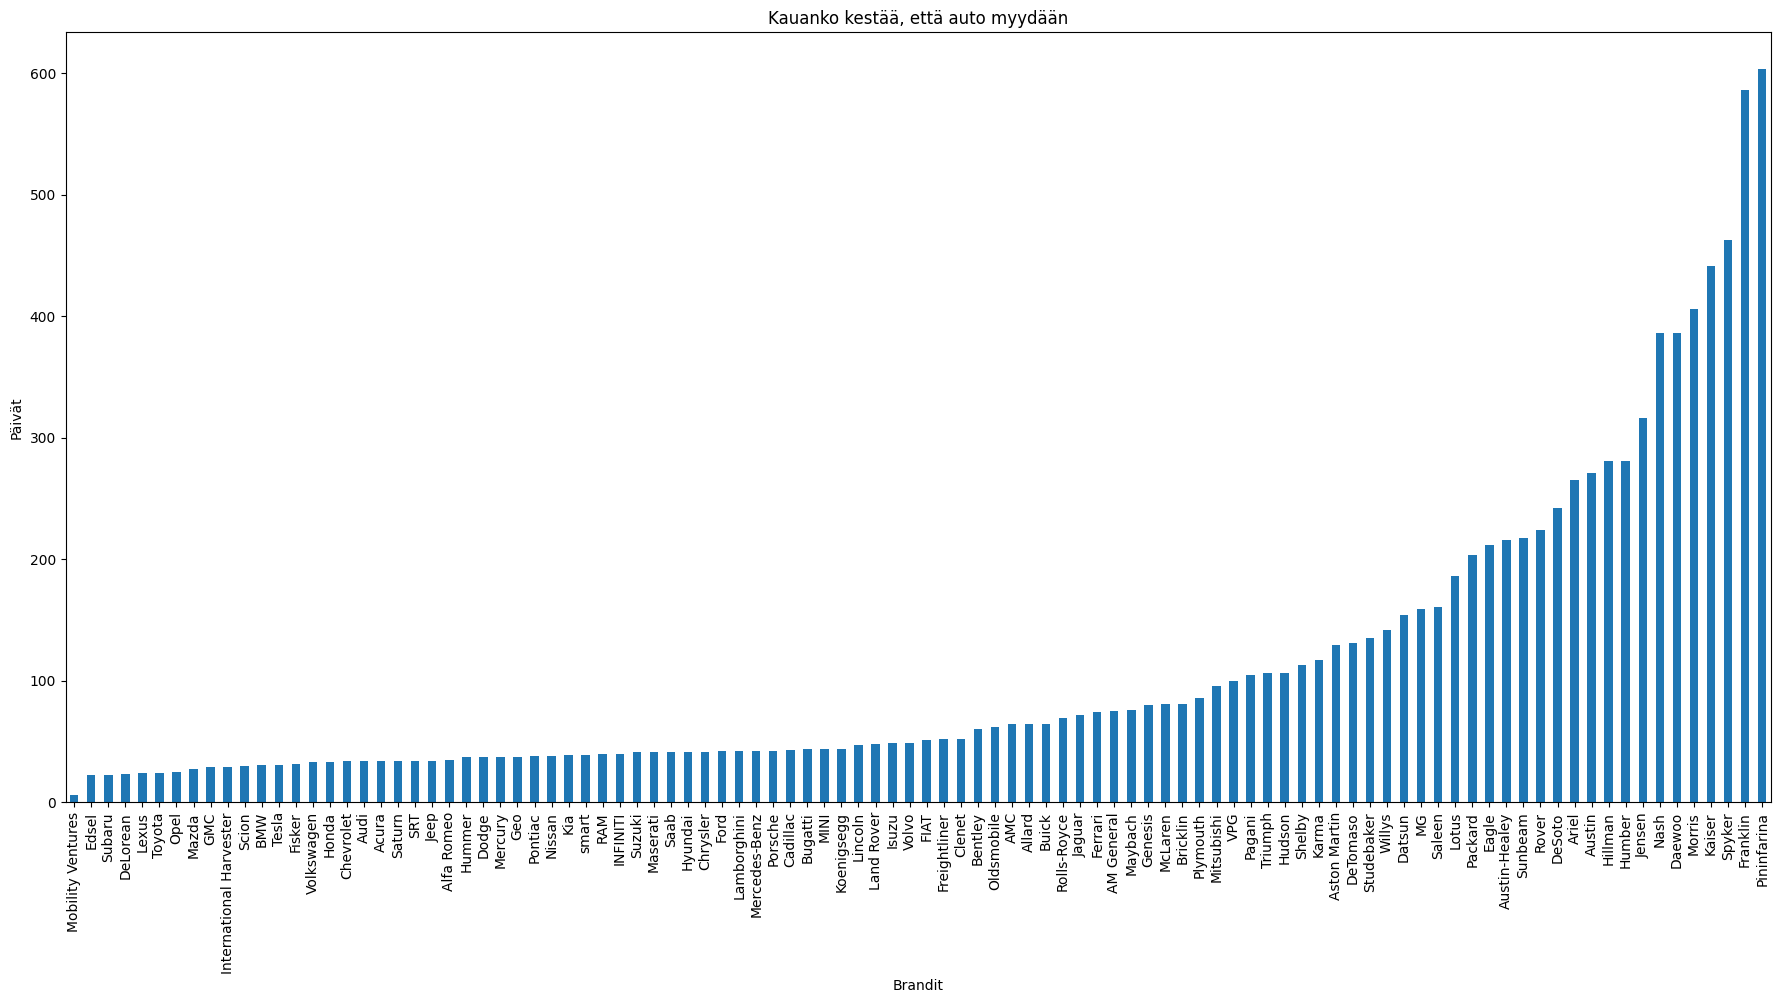

In [29]:
df = df_new.groupby('make_name')['daysonmarket'].median().sort_values(ascending=True)
df.plot(kind='bar',figsize=(22,10),title='Kauanko kestää, että auto myydään',xlabel='Brandit',ylabel='Päivät')

Tästä voidaan havaita, että suurin osa merkeistä viettää suunnilleen saman ajan myytävänä. On kuitenkin merkkejä jotka ovat myytävänä pitempään. Kun puhutaan käytettyjen autojen myynnistä niin näyttäisi, että ehkä pisimpään myynnissä olleet merkit eivät mene käytettynä niin hyvin kaupaksi vaan ostajat haluavat ehkä ostaa suoraan uuden auton. 

Tutkitaan seuraavaksi mitä brandeja myydään kaikista eniten. 

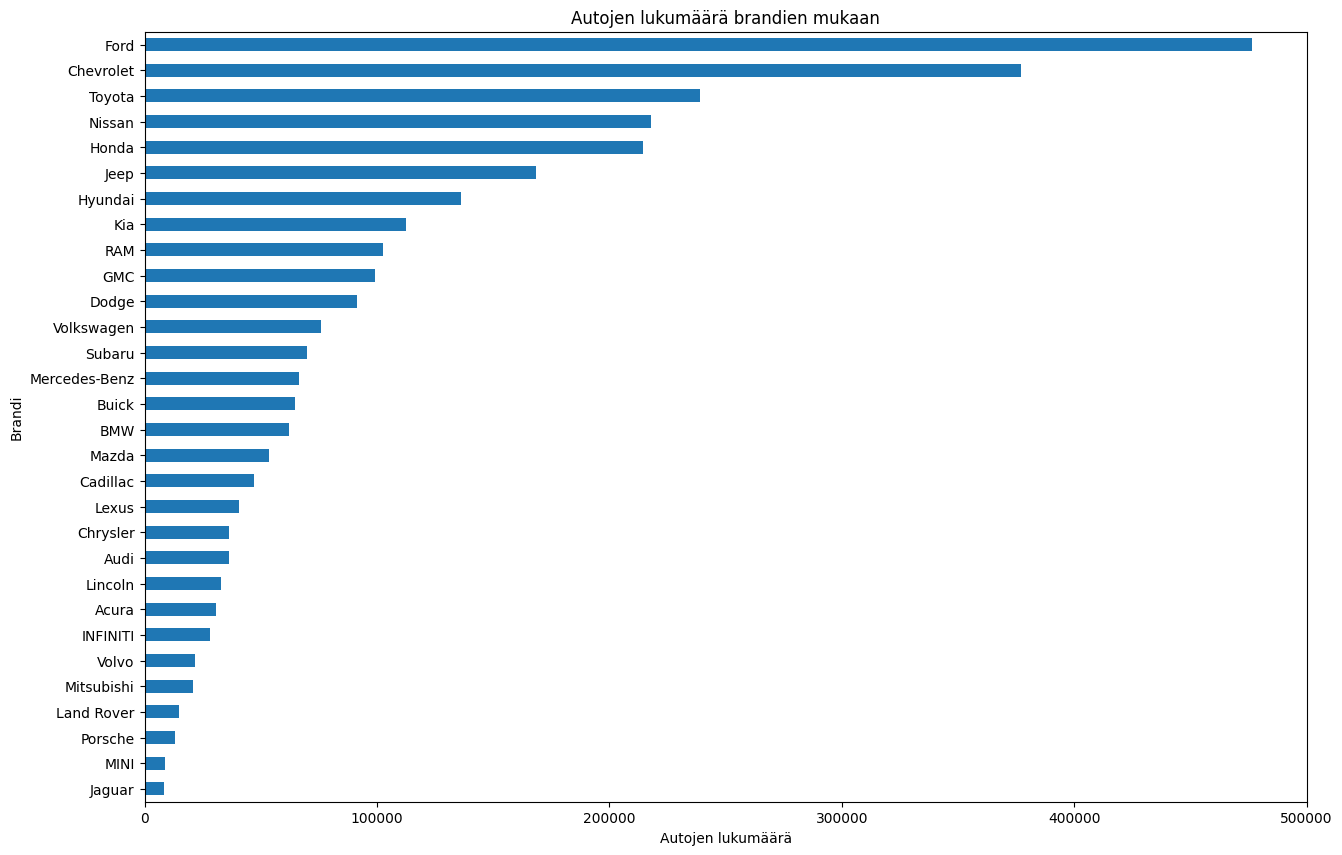

In [33]:
make_counts = df_new['make_name'].value_counts().nlargest(30).sort_values(ascending=True)
make_counts.plot(kind='barh', figsize=(15, 10), title='Autojen lukumäärä brandien mukaan')

plt.xlabel('Autojen lukumäärä')
plt.ylabel('Brandi')
plt.show()

Tästä voidaan nähdä, että käytettyjen autojen joukossa eniten myynnissä olevat merkit on meille erittäin tuttuja. Kun taas harvinaisempia merkkejä ei mene niin hyvin kaupaksi. 


## Yhteenveto

Projektissa on suuri datasetti käytössä ja oli hankaluuksia saada se ajettua kokonaan niin, että sitä pääsi tutkimaan. Datasta voidaan heti havaita, että suuria määriä tyhjiä kenttiä on melkein jokaisessa sarakkeessa ja ne tulee käsitellä seuraavassa vaiheessa, jos halutaan saada mallille ajettua hyvää dataa. Näin ollen saadaan myös parempia tuloksia aikaan. Sarakkeita näytti myös olevan useampia, joissa käydään samoja asioita lävitse ja useammassa sarakkeessa on merkattu yksikkö mukaan arvoihin. Nämä tulee puhdistaa ja käydä lävitse, kun dataa siivotaan. Poikkeamiakin löytyy kuten auton hinnoissa ja varsinkin, kun katsotaan kuinka kauan autot ovat olleet myynnissä. Meidän pitää ryhmän kanssa pohtia mitä tulemme tekemään näiden kanssa. Otetaanko nuo rivit kokonaan datasta pois vai kokeilemmeko ensin ajaa puhdistetun datan näiden kanssa koneenoppimismallille. 

Tässä kohtaa tuntuu, että data on loppujen lopuksi aika yksinkertainen ja varmasti puhdistus tulee onnistumaan ihan hyvin. Voimme ehkä puhdistuksen jälkeen palata vielä miettimään myös tätä vaihetta, jos siinä tulee uusia kohtia esiin. 